In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

## Data Exploration
We will use the WIDER FACE dataset. Let's look at some folders and images.

In [2]:
root_directory = os.getcwd()
dataset_directory = root_directory + '/dataset'
print(root_directory)
print(os.listdir(dataset_directory))

C:\Users\Admin\PycharmProjects\face-detection\ai
['wider_face_split', 'WIDER_train', 'WIDER_val']


In [3]:
num_im_trains = len(os.listdir(root_directory+'/faceset/images/train'))
num_lb_trains = len(os.listdir(root_directory+'/faceset/labels/train'))

print(num_im_trains)
print(num_lb_trains)

10304
10304


In [107]:
train_img_folder = f"{dataset_directory}/WIDER_train/images/"
val_img_folder = f"{dataset_directory}/WIDER_val/images/"
annotations_folder = f"{dataset_directory}/wider_face_split/"

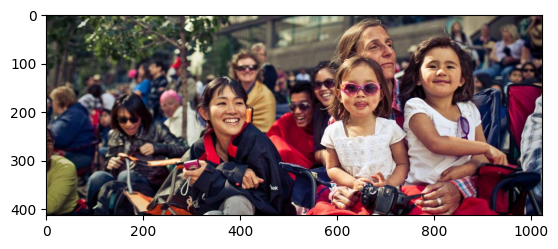

In [81]:
img = Image.open(f"{train_img_folder}0--Parade/0_Parade_Parade_0_3.jpg")
plt.imshow(img)

In [82]:
print(os.listdir(annotations_folder))

['readme.txt', 'wider_face_test.mat', 'wider_face_test_filelist.txt', 'wider_face_train.mat', 'wider_face_train_bbx_gt.txt', 'wider_face_val.mat', 'wider_face_val_bbx_gt.txt']


In [108]:
train_bbx_path = f"{annotations_folder}wider_face_train_bbx_gt.txt"
val_bbx_path = f"{annotations_folder}wider_face_val_bbx_gt.txt"

In [109]:
def load_bbx(bbx_path):
    with open(bbx_path, mode='r') as file:
        lines = file.readlines()

    annotations = {}
    i = 0
    while i < len(lines):
        file_name = lines[i].strip()
        i += 1
        num_boxes = int(lines[i].strip())
        i += 1
        boxes = []
        for _ in range(num_boxes):
            box_info = lines[i].strip().split()
            box = {
                'x': int(box_info[0]),
                'y': int(box_info[1]),
                'w': int(box_info[2]),
                'h': int(box_info[3]),
            }
            boxes.append(box)
            i += 1
        if num_boxes == 0:
            i += 1

        annotations[file_name] = boxes

    return annotations

In [110]:
train_annotations = load_bbx(train_bbx_path)
val_annotations = load_bbx(val_bbx_path)

train_keys = []
val_keys = []
for key in train_annotations.keys():
    train_keys.append(key)
for key in val_annotations.keys():
    val_keys.append(key)

In [111]:
train_annotations['12--Group/12_Group_Group_12_Group_Group_12_324.jpg']

[{'x': 863, 'y': 191, 'w': 106, 'h': 122},
 {'x': 736, 'y': 199, 'w': 74, 'h': 85},
 {'x': 578, 'y': 245, 'w': 49, 'h': 64},
 {'x': 464, 'y': 260, 'w': 47, 'h': 55},
 {'x': 280, 'y': 278, 'w': 63, 'h': 63},
 {'x': 51, 'y': 139, 'w': 176, 'h': 185}]

In [112]:
train_keys[0]

'0--Parade/0_Parade_marchingband_1_849.jpg'

In [113]:
def annotation_to_df(annotation, img_shape):
    cs, xs, ys, ws, hs = [], [], [], [], []

    h, w, _ = img_shape
    for box in annotation:
        cs.append(0)
        xs.append((box["x"] + box["w"] / 2.0) / w)
        ys.append((box["y"] + box["h"] / 2.0) / h)
        ws.append(box["w"] / w)
        hs.append(box["h"] / h)

    return pd.DataFrame({0: cs, 1: xs, 2: ys, 3: ws, 4: hs})

In [114]:
from matplotlib.patches import Rectangle


def plot_boxes(img, df):
    h, w, _ = img.shape

    fig, ax = plt.subplots()
    for index, row in df.iterrows():
        patch = Rectangle(
            ((row[1] - row[3] / 2.0) * w, (row[2] - row[4] / 2.0) * h),
            row[3] * w,
            row[4] * h,
            edgecolor='red',
            fill=False,
        )
        ax.add_patch(patch)

    plt.imshow(img)

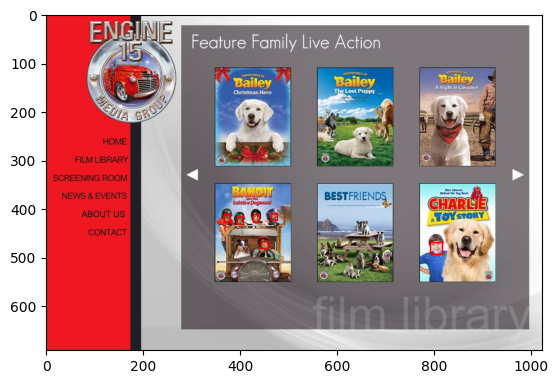

In [115]:
key = train_keys[random.randint(0, len(train_keys) - 1)]
img = np.array(Image.open(f"{train_img_folder}{key}"))
df = annotation_to_df(train_annotations[key], img.shape)
plot_boxes(img, df)

In [116]:
def add_dataset(keys, annotations, img_folder, root, split):
    if not os.path.exists(root):
        os.makedirs(root)
    if not os.path.exists(f"{root}images/{split}"):
        os.makedirs(f"{root}images/{split}")
        os.makedirs(f"{root}labels/{split}")
    for i, key in enumerate(keys):
        img = np.array(Image.open(f"{img_folder}{key}"))
        Image.fromarray(img).save(f"{root}images/{split}/im{i}.jpg")
        df = annotation_to_df(annotations[key], img.shape)
        df.to_csv(f"{root}labels/{split}/im{i}.txt", header=False, index=False, sep='\t')


In [72]:
12880 * 0.8

In [118]:
add_dataset(train_keys[:10304], train_annotations, train_img_folder, f"{root_directory}/faceset/", "train")
add_dataset(train_keys[10304:], train_annotations, train_img_folder, f"{root_directory}/faceset/", "test")

In [117]:
add_dataset(val_keys, val_annotations, val_img_folder, f"{root_directory}/faceset/", "validation")